### 1. Importing Libraries and Loading the Data

After the .csv file 'games.csv' has been copied to the current directory, we can import the data as a Pandas DataFrame. As a DataFrame, we will be able to easily explore the type, amount, and distribution of data.  Furthermore, using a correlation matrix, we can explore the relationships between parameters.  This is an important step in determining the type of machine learning algorithm to utilize. 

Index([u'id', u'type', u'name', u'yearpublished', u'minplayers', u'maxplayers',
       u'playingtime', u'minplaytime', u'maxplaytime', u'minage',
       u'users_rated', u'average_rating', u'bayes_average_rating',
       u'total_owners', u'total_traders', u'total_wanters', u'total_wishers',
       u'total_comments', u'total_weights', u'average_weight'],
      dtype='object')
(81312, 20)


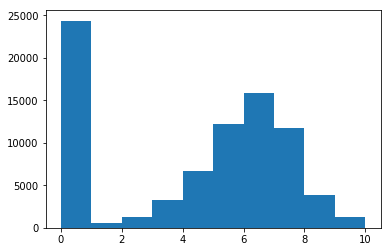

In [179]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read in the data.
games = pandas.read_csv("https://raw.githubusercontent.com/ThaWeatherman/scrapers/master/boardgamegeek/games.csv")
# Print the names of the columns in games.
print(games.columns)
print(games.shape)

# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()

('Before', (81312, 20))
('After ', (56932, 20))


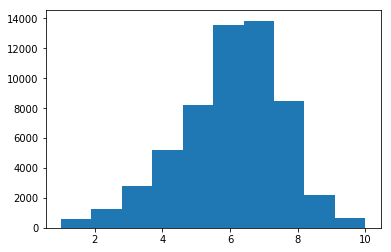

In [180]:
# Print the first row of all the games with zero scores.
# The .iloc method on dataframes allows us to index by position.
#print(games[games["average_rating"] == 0].iloc[0])
# Print the first row of all the games with scores greater than 0.
#print(games[games["average_rating"] > 0].iloc[0])

print('Before',games.shape)
# Remove any rows without user reviews.
games = games[games["users_rated"] > 0]
print('After ',games.shape)

# Remove any rows with missing values.
games = games.dropna(axis=0)

# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()

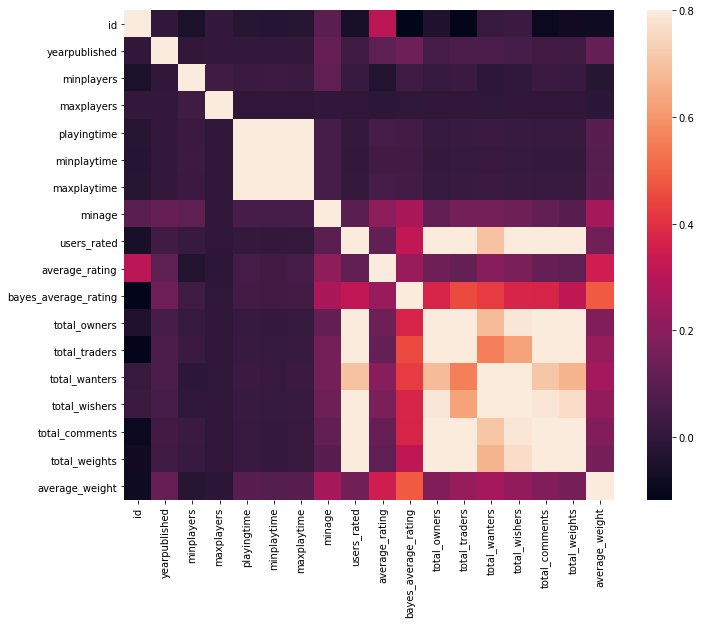

In [181]:
#correlation matrix
corrmat = games.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [0]:
# Get all the columns from the dataframe.
columns = games.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

# Store the variable we'll be predicting on.
target = "average_rating"

### 2. Linear Regression

In the following cells, we will deploy a simple linear regression model to predict the average review of each board game.  We will use the mean squared error as a performance metric.  Furthermore, we will compare and contrast these results with the performance of an ensemble method. 

In [183]:
# Import a convenience function to split the sets.
from sklearn.model_selection import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
#train = games.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
#test = games.loc[~games.index.isin(train.index)]
games.reset_index(drop=True, inplace=True)
games = games[games["average_weight"] > 0]
X = games.loc[:, 'average_weight'].values
y = games.loc[:, 'average_rating'].values
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1),y, test_size = 0.2, random_state = 0)
# Print the shapes of both sets.
print(X_train.shape)
print(X_test.shape)


(28312, 1)
(7078, 1)


In [184]:
# Import the linear regression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()

# Fit the model to the training data.
model.fit(X_train, y_train)

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(X_test)

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, y_test)

1.2810180479947642

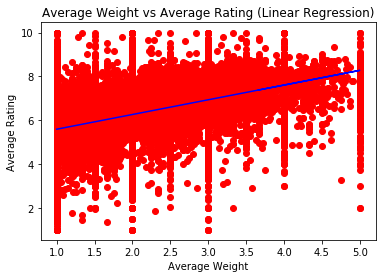

In [185]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Average Weight vs Average Rating (Linear Regression)')
plt.xlabel('Average Weight')
plt.ylabel('Average Rating')
plt.show()

In [186]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(X_train, y_train)
# Make predictions.
predictions = model.predict(X_test)
# Compute the error.
mean_squared_error(predictions, y_test)

1.227300702708837

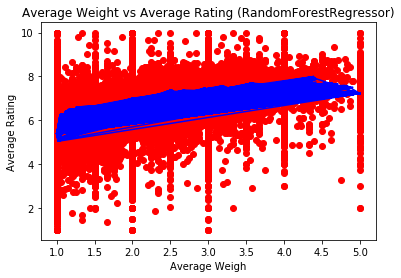

In [187]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Average Weight vs Average Rating (RandomForestRegressor)')
plt.xlabel('Average Weigh')
plt.ylabel('Average Rating')
plt.show()